In [18]:
import pandas as pd

In [19]:
xg_data = pd.read_csv('epl_xg.csv')

In [20]:
xg_data

,Team,Games,G,GA,xG,xGA,NPxG,NPxGA
0,Arsenal,8,19,10,10.41,10.95,10.41,10.95
1,Bournemouth,8,16,12,16.08,9.25,12.27,7.73
2,Brighton,8,9,13,9.49,14.71,6.44,12.43
3,Burnley,8,10,12,7.69,14.11,7.69,13.35
4,Cardiff,8,4,17,7.44,13.68,7.44,11.40
5,Chelsea,8,18,5,15.72,8.59,13.44,8.59
6,Crystal Palace,8,5,9,7.02,11.56,7.02,9.28
7,Everton,8,13,12,9.52,9.76,8.76,9.00
8,Fulham,8,9,21,9.41,18.00,9.41,15.71
9,Huddersfield,8,4,17,4.75,13.26,4.75,11.74


In [21]:
xg_data['GD'] = xg_data['G'] - xg_data['GA']
xg_data['xGD'] = xg_data['xG'] - xg_data['xGA']
xg_data['NPxGD'] = xg_data['NPxG'] - xg_data['NPxGA']

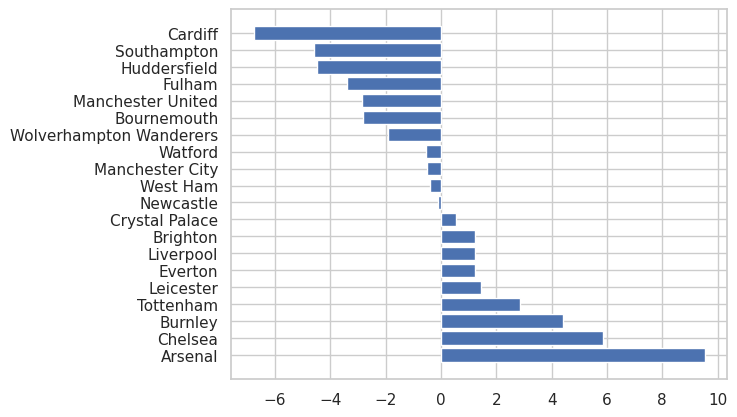

In [22]:
xg_data['GD_vs_xGD'] = xg_data['GD']-xg_data['xGD']
xg_data = xg_data.sort_values(by=['GD_vs_xGD'],ascending=False)

from matplotlib import pyplot as plt
plt.barh(xg_data['Team'],xg_data['GD_vs_xGD'])

plt.show()

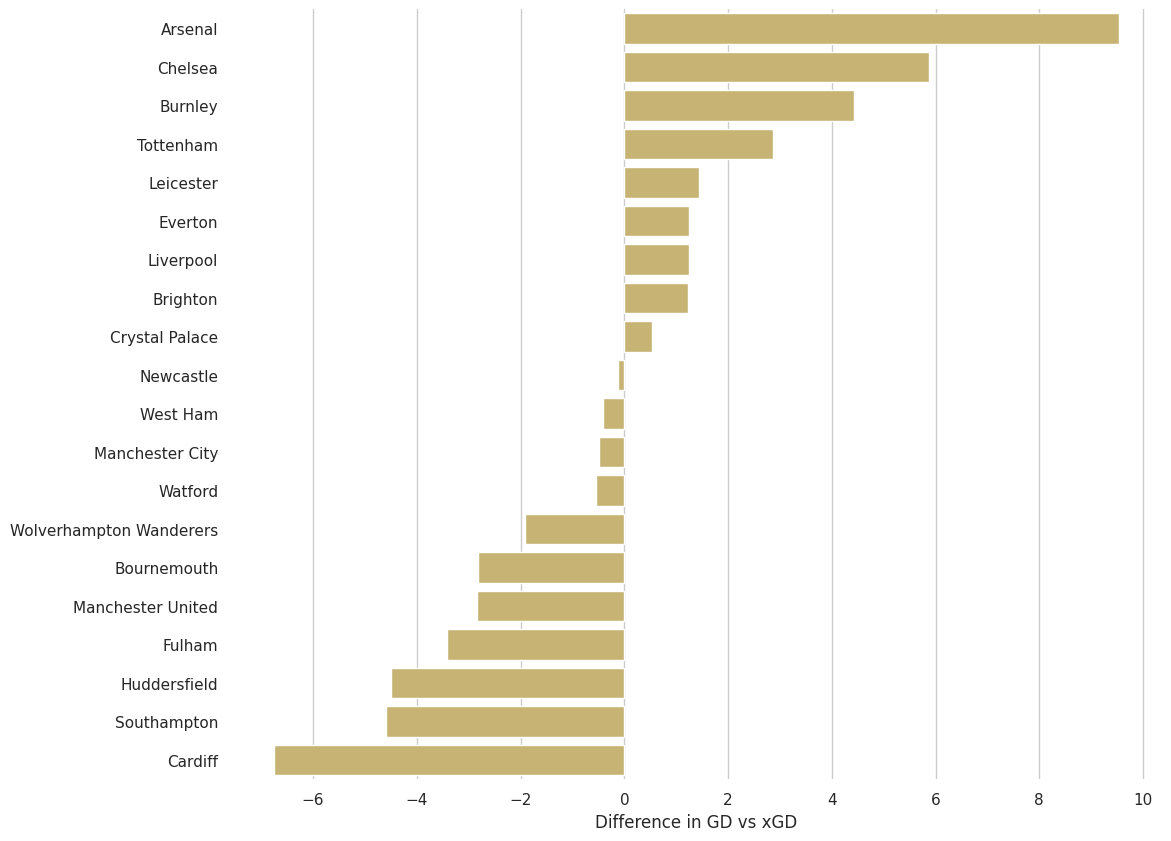

In [23]:
import seaborn as sns
sns.set(style='whitegrid')
sns.set_color_codes('muted')

f,ax=plt.subplots(figsize=(12,10))
sns.barplot(x='GD_vs_xGD',y='Team',data=xg_data,color='y')

ax.set(ylabel='',xlabel='Difference in GD vs xGD')

sns.despine(left=True,bottom=True)

In [24]:
xg_data.to_csv('xg_data_inc_gd.csv')

In [25]:
print(list (xg_data))

['Team', 'Games', 'G', 'GA', 'xG', 'xGA', 'NPxG', 'NPxGA', 'GD', 'xGD', 'NPxGD', 'GD_vs_xGD']


In [26]:
cols = ['G', 'GA', 'xG', 'xGA', 'NPxG', 'NPxGA', 'GD', 'xGD', 'NPxGD']

In [27]:
for col in cols:
  xg_data[f'{col}_pg'] = xg_data[col]/xg_data['Games']

xg_data

,Team,Games,G,GA,xG,xGA,NPxG,NPxGA,GD,xGD,...,GD_vs_xGD,G_pg,GA_pg,xG_pg,xGA_pg,NPxG_pg,NPxGA_pg,GD_pg,xGD_pg,NPxGD_pg
0,Arsenal,8,19,10,10.41,10.95,10.41,10.95,9,-0.54,...,9.54,2.375,1.250,1.30125,1.36875,1.30125,1.36875,1.125,-0.06750,-0.06750
5,Chelsea,8,18,5,15.72,8.59,13.44,8.59,13,7.13,...,5.87,2.250,0.625,1.96500,1.07375,1.68000,1.07375,1.625,0.89125,0.60625
3,Burnley,8,10,12,7.69,14.11,7.69,13.35,-2,-6.42,...,4.42,1.250,1.500,0.96125,1.76375,0.96125,1.66875,-0.250,-0.80250,-0.70750
16,Tottenham,8,15,7,14.79,9.66,13.27,9.66,8,5.13,...,2.87,1.875,0.875,1.84875,1.20750,1.65875,1.20750,1.000,0.64125,0.45125
10,Leicester,8,14,12,9.14,8.58,7.62,7.05,2,0.56,...,1.44,1.750,1.500,1.14250,1.07250,0.95250,0.88125,0.250,0.07000,0.07125
7,Everton,8,13,12,9.52,9.76,8.76,9.00,1,-0.24,...,1.24,1.625,1.500,1.19000,1.22000,1.09500,1.12500,0.125,-0.03000,-0.03000
11,Liverpool,8,15,3,16.66,5.90,15.90,5.14,12,10.76,...,1.24,1.875,0.375,2.08250,0.73750,1.98750,0.64250,1.500,1.34500,1.34500
2,Brighton,8,9,13,9.49,14.71,6.44,12.43,-4,-5.22,...,1.22,1.125,1.625,1.18625,1.83875,0.80500,1.55375,-0.500,-0.65250,-0.74875
6,Crystal Palace,8,5,9,7.02,11.56,7.02,9.28,-4,-4.54,...,0.54,0.625,1.125,0.87750,1.44500,0.87750,1.16000,-0.500,-0.56750,-0.28250
14,Newcastle,8,6,13,5.98,12.86,5.22,11.34,-7,-6.88,...,-0.12,0.750,1.625,0.74750,1.60750,0.65250,1.41750,-0.875,-0.86000,-0.76500


In [28]:
fixtures = pd.read_csv('epl_fixtures.csv')
fixtures.replace('Wolves','Wolverhampton Wanderers')

,Home_Team,Away_Team
0,Chelsea,Manchester United
1,Bournemouth,Southampton
2,Cardiff,Fulham
3,Manchester City,Burnley
4,Newcastle,Brighton
5,West Ham,Tottenham
6,Wolverhampton Wanderers,Watford
7,Huddersfield,Liverpool
8,Everton,Crystal Palace
9,Arsenal,Leicester


In [29]:
xg_data_pg = xg_data[['Team', 'xG_pg', 'xGA_pg']]

In [30]:
xg_data_pg

,Team,xG_pg,xGA_pg
0,Arsenal,1.30125,1.36875
5,Chelsea,1.96500,1.07375
3,Burnley,0.96125,1.76375
16,Tottenham,1.84875,1.20750
10,Leicester,1.14250,1.07250
7,Everton,1.19000,1.22000
11,Liverpool,2.08250,0.73750
2,Brighton,1.18625,1.83875
6,Crystal Palace,0.87750,1.44500
14,Newcastle,0.74750,1.60750


In [33]:
fixtures = pd.merge(fixtures,xg_data_pg,left_on="Away_Team",right_on="Team")
fixtures

,Home_Team,Away_Team,Team_x,xG_pg_x,xGA_pg_x,Team_y,xG_pg_y,xGA_pg_y
0,Chelsea,Manchester United,Manchester United,1.60375,1.37250,Manchester United,1.60375,1.37250
1,Bournemouth,Southampton,Southampton,1.32625,1.75250,Southampton,1.32625,1.75250
2,Cardiff,Fulham,Fulham,1.17625,2.25000,Fulham,1.17625,2.25000
3,Manchester City,Burnley,Burnley,0.96125,1.76375,Burnley,0.96125,1.76375
4,Newcastle,Brighton,Brighton,1.18625,1.83875,Brighton,1.18625,1.83875
5,West Ham,Tottenham,Tottenham,1.84875,1.20750,Tottenham,1.84875,1.20750
6,Wolves,Watford,Watford,1.31875,1.37625,Watford,1.31875,1.37625
7,Huddersfield,Liverpool,Liverpool,2.08250,0.73750,Liverpool,2.08250,0.73750
8,Everton,Crystal Palace,Crystal Palace,0.87750,1.44500,Crystal Palace,0.87750,1.44500
9,Arsenal,Leicester,Leicester,1.14250,1.07250,Leicester,1.14250,1.07250


In [34]:
fixtures = fixtures.drop(['Team_x','Team_y'],axis=1)
fixtures

,Home_Team,Away_Team,xG_pg_x,xGA_pg_x,xG_pg_y,xGA_pg_y
0,Chelsea,Manchester United,1.60375,1.37250,1.60375,1.37250
1,Bournemouth,Southampton,1.32625,1.75250,1.32625,1.75250
2,Cardiff,Fulham,1.17625,2.25000,1.17625,2.25000
3,Manchester City,Burnley,0.96125,1.76375,0.96125,1.76375
4,Newcastle,Brighton,1.18625,1.83875,1.18625,1.83875
5,West Ham,Tottenham,1.84875,1.20750,1.84875,1.20750
6,Wolves,Watford,1.31875,1.37625,1.31875,1.37625
7,Huddersfield,Liverpool,2.08250,0.73750,2.08250,0.73750
8,Everton,Crystal Palace,0.87750,1.44500,0.87750,1.44500
9,Arsenal,Leicester,1.14250,1.07250,1.14250,1.07250


In [ ]:
colnames = {'xG_pg_x': 'xG_pg_home_team', 'xGA_pg_x': 'xGA_pg_home_team', 'xG_pg_y': 'xG_pg_away_team', 'xGA_pg_y': 'xGA_pg_away_team'}
fixtures = fixtures.rename(columns=colnames)
fixtures

In [37]:
xG_avg = xg_data_pg['xG_pg'].mean()
matchups = fixtures.copy()
matchups['xG_adjusted_home_team'] = (matchups['xG_pg_home_team'] * matchups['xGA_pg_away_team']) / xG_avg
matchups['xG_adjusted_away_team'] = (matchups['xG_pg_away_team'] * matchups['xGA_pg_home_team']) / xG_avg
matchups


,Home_Team,Away_Team,xG_pg_home_team,xGA_pg_home_team,xG_pg_away_team,xGA_pg_away_team,xG_adjusted_home_team,xG_adjusted_away_team
0,Chelsea,Manchester United,1.60375,1.37250,1.60375,1.37250,1.598146,1.598146
1,Bournemouth,Southampton,1.32625,1.75250,1.32625,1.75250,1.687528,1.687528
2,Cardiff,Fulham,1.17625,2.25000,1.17625,2.25000,1.921541,1.921541
3,Manchester City,Burnley,0.96125,1.76375,0.96125,1.76375,1.230951,1.230951
4,Newcastle,Brighton,1.18625,1.83875,1.18625,1.83875,1.583676,1.583676
5,West Ham,Tottenham,1.84875,1.20750,1.84875,1.20750,1.620813,1.620813
6,Wolves,Watford,1.31875,1.37625,1.31875,1.37625,1.317733,1.317733
7,Huddersfield,Liverpool,2.08250,0.73750,2.08250,0.73750,1.115102,1.115102
8,Everton,Crystal Palace,0.87750,1.44500,0.87750,1.44500,0.920624,0.920624
9,Arsenal,Leicester,1.14250,1.07250,1.14250,1.07250,0.889654,0.889654


In [38]:
matchups['xG_adjusted_home_team'] = matchups['xG_adjusted_home_team'] * 1.1
matchups['xG_adjusted_away_team'] = matchups['xG_adjusted_away_team'] * 0.87
matchups

,Home_Team,Away_Team,xG_pg_home_team,xGA_pg_home_team,xG_pg_away_team,xGA_pg_away_team,xG_adjusted_home_team,xG_adjusted_away_team
0,Chelsea,Manchester United,1.60375,1.37250,1.60375,1.37250,1.757961,1.390387
1,Bournemouth,Southampton,1.32625,1.75250,1.32625,1.75250,1.856281,1.468149
2,Cardiff,Fulham,1.17625,2.25000,1.17625,2.25000,2.113695,1.671741
3,Manchester City,Burnley,0.96125,1.76375,0.96125,1.76375,1.354046,1.070928
4,Newcastle,Brighton,1.18625,1.83875,1.18625,1.83875,1.742044,1.377798
5,West Ham,Tottenham,1.84875,1.20750,1.84875,1.20750,1.782894,1.410107
6,Wolves,Watford,1.31875,1.37625,1.31875,1.37625,1.449506,1.146427
7,Huddersfield,Liverpool,2.08250,0.73750,2.08250,0.73750,1.226612,0.970139
8,Everton,Crystal Palace,0.87750,1.44500,0.87750,1.44500,1.012687,0.800943
9,Arsenal,Leicester,1.14250,1.07250,1.14250,1.07250,0.978619,0.773999


In [39]:
bookies = pd.read_csv('epl_week_9_implied_goals.csv')
bookies

,Home_Team,Away_Team,Bookies_Home_Goals,Bookies_Away_Goals
0,Chelsea,Manchester United,1.869,1.070
1,Bournemouth,Southampton,1.632,1.219
2,Cardiff,Fulham,1.440,1.378
3,Manchester City,Burnley,3.536,0.506
4,Newcastle,Brighton,1.261,0.951
5,West Ham,Tottenham,1.172,1.899
6,Wolverhampton Wanderers,Watford,1.626,0.881
7,Huddersfield,Liverpool,0.554,2.377
8,Everton,Crystal Palace,1.645,1.016
9,Arsenal,Leicester,2.237,1.032


In [40]:
matchups = pd.merge(matchups, bookies)
matchups

,Home_Team,Away_Team,xG_pg_home_team,xGA_pg_home_team,xG_pg_away_team,xGA_pg_away_team,xG_adjusted_home_team,xG_adjusted_away_team,Bookies_Home_Goals,Bookies_Away_Goals
0,Chelsea,Manchester United,1.60375,1.37250,1.60375,1.37250,1.757961,1.390387,1.869,1.070
1,Bournemouth,Southampton,1.32625,1.75250,1.32625,1.75250,1.856281,1.468149,1.632,1.219
2,Cardiff,Fulham,1.17625,2.25000,1.17625,2.25000,2.113695,1.671741,1.440,1.378
3,Manchester City,Burnley,0.96125,1.76375,0.96125,1.76375,1.354046,1.070928,3.536,0.506
4,Newcastle,Brighton,1.18625,1.83875,1.18625,1.83875,1.742044,1.377798,1.261,0.951
5,West Ham,Tottenham,1.84875,1.20750,1.84875,1.20750,1.782894,1.410107,1.172,1.899
6,Huddersfield,Liverpool,2.08250,0.73750,2.08250,0.73750,1.226612,0.970139,0.554,2.377
7,Everton,Crystal Palace,0.87750,1.44500,0.87750,1.44500,1.012687,0.800943,1.645,1.016
8,Arsenal,Leicester,1.14250,1.07250,1.14250,1.07250,0.978619,0.773999,2.237,1.032


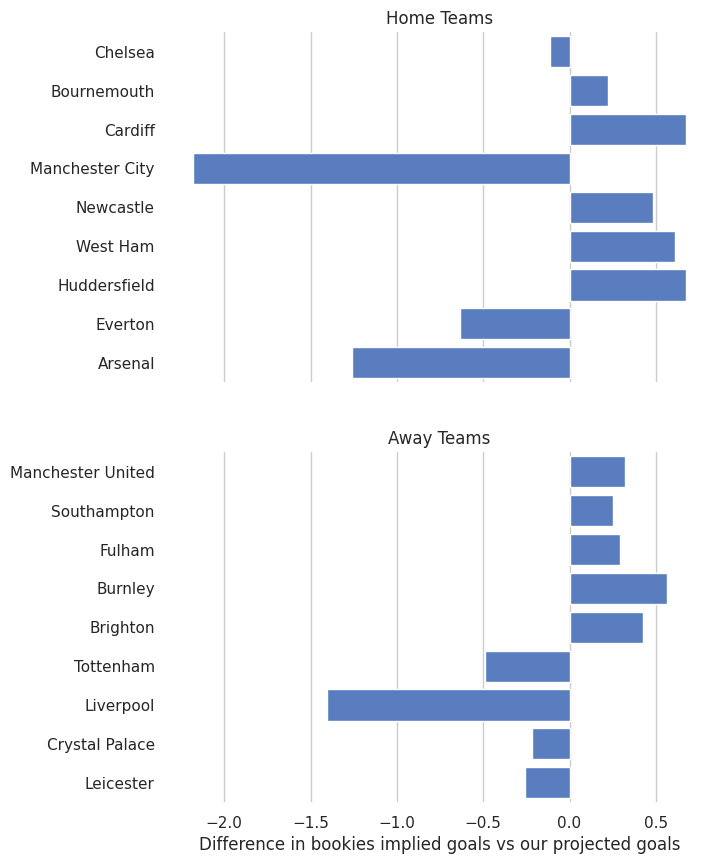

In [41]:
matchups['home_goals_diff'] = matchups['xG_adjusted_home_team'] - matchups['Bookies_Home_Goals']
matchups['away_goals_diff'] = matchups['xG_adjusted_away_team'] - matchups['Bookies_Away_Goals']

from matplotlib import pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
sns.set_color_codes('muted')

f, (ax1, ax2) = plt.subplots(nrows=2, figsize=(7, 10), sharex=True)

sns.barplot(x='home_goals_diff', y='Home_Team', data=matchups, color='b', ax=ax1)
sns.barplot(x='away_goals_diff', y='Away_Team', data=matchups, color='b', ax=ax2)

ax1.set(xlabel='', ylabel='', title='Home Teams')
ax2.set(xlabel='Difference in bookies implied goals vs our projected goals', ylabel='', title='Away Teams')

sns.despine(left=True, bottom=True)

In [42]:
# Import the numpy module (package designed for scientific computing)
import numpy as np

# Define a function to calculate win and clean sheet percentages based on average goal totals for each team
# The general format is
# def function_name(function_inputs):
#     do things
#     return result
# It's always a good idea to include a 'docstring' in your function, which is a description of how to use the function surrounded by triple quotes
def win_cs(df, home_goals_col, away_goals_col, n=10000):
  """Generates win and clean sheet percentages for each row of a dataframe, df, by using average goal totals from home_goals_col and away_goals_col
  n = number of sims to run, set at 10000 by default"""

  # Create blank lists for wins and clean sheets
  home_win_list = []
  away_win_list = []
  home_cs_list = []
  away_cs_list = []
  over_two_point_five_goals = []

  # Iterate through each row (i) in the dataframe
  for i in range(len(df)):
    # Get home and away projected goals for that row
    avg_home_goals = df.iloc[i][home_goals_col]
    avg_away_goals = df.iloc[i][away_goals_col]

    # Simulate home and away goals by drawing from a random poisson distribution n times
    home_goals_sim = np.random.poisson(avg_home_goals, n)
    away_goals_sim = np.random.poisson(avg_away_goals, n)

    # Create a new dataframe, sim, with the columns as the results
    sim = pd.DataFrame({'home_score': home_goals_sim, 'away_score': away_goals_sim})

    # Add new columns by using np.where() to evaluate conditional expressions, setting 1 for true and 0 for false
    sim['home_win'] = np.where(sim['home_score'] > sim['away_score'], 1, 0)
    sim['away_win'] = np.where(sim['away_score'] > sim['home_score'], 1, 0)
    # If the total number of goals scored in the game is greater than 2.5, we assign Yes and No otherwise
    sim['over_2.5_goals'] = np.where(sim['home_score'] + sim['away_score'] >= 2.5, 'Yes','No')
    sim['home_clean_sheet'] = np.where(sim['away_score'] == 0, 1, 0)
    sim['away_clean_sheet'] = np.where(sim['home_score'] == 0, 1, 0)

    # Sum the number of each result and divide by total number of sims to get percentages
    # Append the result to the corresponding list each time
    # As we iterate through the dataframe the win and clean sheet percentages for each row will be added to the end of the lists, until eventually we have values for each row
    home_win_list.append(sim['home_win'].sum() / n)
    away_win_list.append(sim['away_win'].sum() / n)
    home_cs_list.append(sim['home_clean_sheet'].sum() / n)
    away_cs_list.append(sim['away_clean_sheet'].sum() / n)
    # If the values is Yes, .eq() gives a True value and False otherwise. Then .mean() is done to calculate the average. True is 1 and False is 0
    over_two_point_five_goals.append(sim['over_2.5_goals'].eq('Yes').mean())

  # Add new columns to the input dataframe from the lists containing win and clean sheet percentages
  df['home_win'] = np.asarray(home_win_list)
  df['away_win'] = np.asarray(away_win_list)
  df['home_clean_sheet'] = np.asarray(home_cs_list)
  df['away_clean_sheet'] = np.asarray(away_cs_list)
  df['over_two_point_five_goals'] = np.asarray(over_two_point_five_goals)

  return df

# Run our new function, specifying the paramaters we want as inputs
# Note that because we set n=10000 when we defined the function, we don't need to set a value of n here
matchups = win_cs(df=matchups, home_goals_col='xG_adjusted_home_team', away_goals_col='xG_adjusted_away_team')

# Check the results (note how you can re-order the columns)
displaycols = ['Home_Team', 'xG_adjusted_home_team', 'home_win', 'home_clean_sheet',
'Away_Team', 'xG_adjusted_away_team', 'away_win', 'away_clean_sheet','over_two_point_five_goals']
matchups[displaycols]

,Home_Team,xG_adjusted_home_team,home_win,home_clean_sheet,Away_Team,xG_adjusted_away_team,away_win,away_clean_sheet,over_two_point_five_goals
0,Chelsea,1.757961,0.4632,0.2468,Manchester United,1.390387,0.2999,0.1697,0.6096
1,Bournemouth,1.856281,0.4641,0.2279,Southampton,1.468149,0.3171,0.1583,0.6551
2,Cardiff,2.113695,0.4920,0.1919,Fulham,1.671741,0.2933,0.1177,0.7184
3,Manchester City,1.354046,0.4281,0.3469,Burnley,1.070928,0.2951,0.2603,0.4293
4,Newcastle,1.742044,0.4678,0.2535,Brighton,1.377798,0.3005,0.1717,0.6049
5,West Ham,1.782894,0.4688,0.2457,Tottenham,1.410107,0.2976,0.1631,0.6184
6,Huddersfield,1.226612,0.4196,0.3693,Liverpool,0.970139,0.3005,0.2962,0.3703
7,Everton,1.012687,0.3899,0.4467,Crystal Palace,0.800943,0.2839,0.3606,0.2722
8,Arsenal,0.978619,0.3922,0.4621,Leicester,0.773999,0.2788,0.3748,0.2572


In [43]:
# Because we put our previous code inside a function, we can easily re-run the function using the bookies' implied totals instead
matchups2 = win_cs(df=matchups, home_goals_col='Bookies_Home_Goals', away_goals_col='Bookies_Away_Goals')

# Check the results (note how you can re-order the columns)
displaycols = ['Home_Team', 'Bookies_Home_Goals', 'home_win', 'home_clean_sheet',
'Away_Team', 'Bookies_Away_Goals', 'away_win', 'away_clean_sheet']
matchups2[displaycols]

,Home_Team,Bookies_Home_Goals,home_win,home_clean_sheet,Away_Team,Bookies_Away_Goals,away_win,away_clean_sheet
0,Chelsea,1.869,0.5599,0.3444,Manchester United,1.070,0.2220,0.1581
1,Bournemouth,1.632,0.4597,0.2920,Southampton,1.219,0.2886,0.2024
2,Cardiff,1.440,0.3807,0.2517,Fulham,1.378,0.3632,0.2420
3,Manchester City,3.536,0.9088,0.5995,Burnley,0.506,0.0246,0.0281
4,Newcastle,1.261,0.4259,0.3875,Brighton,0.951,0.2832,0.2887
5,West Ham,1.172,0.2350,0.1545,Tottenham,1.899,0.5434,0.3115
6,Huddersfield,0.554,0.0705,0.0926,Liverpool,2.377,0.7796,0.5773
7,Everton,1.645,0.5155,0.3709,Crystal Palace,1.016,0.2377,0.1930
8,Arsenal,2.237,0.6397,0.3519,Leicester,1.032,0.1636,0.1081


Starting the Part 3 from here


In [46]:
import pandas as pd
import re
import random
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
import datetime

In [ ]:
!pip install selenium

In [48]:
injuries_url = 'https://www.fantasyfootballscout.co.uk/fantasy-football-injuries/'
injury_tables = pd.read_html(injuries_url,encoding='utf-8')
injuries = injury_tables[0]
injuries.head(10)

,Name,Club,Status,Return Date,Latest News,Last Updated
0,Xhaka (Granit),ARS,Unavailable,Unknown,Transferred to Bayer Leverkusen,11/07/2023
1,Álex Moreno,AVL,Doubt 50%,12/08/2023,Hamstring injury Limped off with a hamstring i...,22/06/2023
2,Pearson (Ben),BOU,Unavailable,Unknown,Transferred to Stoke City,11/07/2023
3,Toney (Ivan),BRE,Suspended,17/01/2024,Eight-month ban Suspended for eight months for...,17/05/2023
4,Trevitt (Ryan),BRE,On Loan,01/07/2024,Joined Exeter City on a season-long loan,18/07/2023
5,Scherpen (Kjell),BHA,On Loan,01/07/2024,Joined Sturm Graz on a season-long loan.,06/07/2023
6,Azpilicueta (César),CHE,Unavailable,Unknown,Transferred to Atletico Madrid,11/07/2023
7,Fofana (David Datro),CHE,On Loan,01/07/2024,Joined Union Berlin on a season-long loan,11/07/2023
8,Fofana (Wesley),CHE,Injured,Unknown,Knee injury It was revealed on 18/7 that he ha...,18/07/2023
9,Olise (Michael),CRY,Doubt 25%,30/09/2023,Hamstring injury Reports suggest he will miss ...,29/06/2023


In [49]:
injuries['last_name'] = injuries['Name'].str.split('(').str.get(0)
injuries['first_name'] = injuries['Name'].str.split('(').str.get(1).str.strip(')')
injuries['full_name'] = injuries['first_name'] + ' ' + injuries['last_name']
injuries.head()

,Name,Club,Status,Return Date,Latest News,Last Updated,last_name,first_name,full_name
0,Xhaka (Granit),ARS,Unavailable,Unknown,Transferred to Bayer Leverkusen,11/07/2023,Xhaka,Granit,Granit Xhaka
1,Álex Moreno,AVL,Doubt 50%,12/08/2023,Hamstring injury Limped off with a hamstring i...,22/06/2023,Álex Moreno,NaN,NaN
2,Pearson (Ben),BOU,Unavailable,Unknown,Transferred to Stoke City,11/07/2023,Pearson,Ben,Ben Pearson
3,Toney (Ivan),BRE,Suspended,17/01/2024,Eight-month ban Suspended for eight months for...,17/05/2023,Toney,Ivan,Ivan Toney
4,Trevitt (Ryan),BRE,On Loan,01/07/2024,Joined Exeter City on a season-long loan,18/07/2023,Trevitt,Ryan,Ryan Trevitt


In [50]:
injuries[injuries['full_name'].isna()]

,Name,Club,Status,Return Date,Latest News,Last Updated,last_name,first_name,full_name
1,Álex Moreno,AVL,Doubt 50%,12/08/2023,Hamstring injury Limped off with a hamstring i...,22/06/2023,Álex Moreno,NaN,NaN


In [51]:
injuries['last_name'] = injuries['last_name'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
injuries.head()

,Name,Club,Status,Return Date,Latest News,Last Updated,last_name,first_name,full_name
0,Xhaka (Granit),ARS,Unavailable,Unknown,Transferred to Bayer Leverkusen,11/07/2023,Xhaka,Granit,Granit Xhaka
1,Álex Moreno,AVL,Doubt 50%,12/08/2023,Hamstring injury Limped off with a hamstring i...,22/06/2023,Alex Moreno,NaN,NaN
2,Pearson (Ben),BOU,Unavailable,Unknown,Transferred to Stoke City,11/07/2023,Pearson,Ben,Ben Pearson
3,Toney (Ivan),BRE,Suspended,17/01/2024,Eight-month ban Suspended for eight months for...,17/05/2023,Toney,Ivan,Ivan Toney
4,Trevitt (Ryan),BRE,On Loan,01/07/2024,Joined Exeter City on a season-long loan,18/07/2023,Trevitt,Ryan,Ryan Trevitt


In [52]:
injuries['full_name'] = injuries['full_name'].fillna(injuries['last_name'])

# Check the results now by printing the full name column for players that don't have a first name
print(injuries['full_name'][injuries['first_name'].isna()])
print('')

1    Alex Moreno
Name: full_name, dtype: object



In [53]:
injuries = injuries[['full_name', 'Club', 'Status', 'Return Date', 'Latest News', 'Last Updated']]

injuries.columns = injuries.columns.str.lower().str.replace(' ', '_')
injuries.head()

,full_name,club,status,return_date,latest_news,last_updated
0,Granit Xhaka,ARS,Unavailable,Unknown,Transferred to Bayer Leverkusen,11/07/2023
1,Alex Moreno,AVL,Doubt 50%,12/08/2023,Hamstring injury Limped off with a hamstring i...,22/06/2023
2,Ben Pearson,BOU,Unavailable,Unknown,Transferred to Stoke City,11/07/2023
3,Ivan Toney,BRE,Suspended,17/01/2024,Eight-month ban Suspended for eight months for...,17/05/2023
4,Ryan Trevitt,BRE,On Loan,01/07/2024,Joined Exeter City on a season-long loan,18/07/2023


In [54]:
injuries.dtypes

full_name       object
club            object
status          object
return_date     object
latest_news     object
last_updated    object
dtype: object

In [55]:
injuries['last_updated'] = pd.to_datetime(injuries['last_updated'], format='%d/%m/%Y')
injuries.head()

<ipython-input-55-b14d469c4c3a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injuries['last_updated'] = pd.to_datetime(injuries['last_updated'], format='%d/%m/%Y')


,full_name,club,status,return_date,latest_news,last_updated
0,Granit Xhaka,ARS,Unavailable,Unknown,Transferred to Bayer Leverkusen,2023-07-11
1,Alex Moreno,AVL,Doubt 50%,12/08/2023,Hamstring injury Limped off with a hamstring i...,2023-06-22
2,Ben Pearson,BOU,Unavailable,Unknown,Transferred to Stoke City,2023-07-11
3,Ivan Toney,BRE,Suspended,17/01/2024,Eight-month ban Suspended for eight months for...,2023-05-17
4,Ryan Trevitt,BRE,On Loan,01/07/2024,Joined Exeter City on a season-long loan,2023-07-18


In [56]:
# Get current date from the datetime library
today = datetime.date.today()

# Get date from one week ago
one_week_ago = today - datetime.timedelta(days=7)
one_week_ago = datetime.datetime.combine(one_week_ago, datetime.datetime.min.time())

# Filter injuries to show recent news from the past week
recent_injuries = injuries[injuries['last_updated'] >= one_week_ago]
recent_injuries.head()

,full_name,club,status,return_date,latest_news,last_updated
4,Ryan Trevitt,BRE,On Loan,01/07/2024,Joined Exeter City on a season-long loan,2023-07-18
8,Wesley Fofana,CHE,Injured,Unknown,Knee injury It was revealed on 18/7 that he ha...,2023-07-18


In [57]:
# Check which players are confirmed out for the next set of fixtures
# Specify a date just past the next round of fixtures
next_fixtures = datetime.datetime(2018, 10, 23)

# Separate out 'Unknown' return date from the rest
unknown_return = injuries[injuries['return_date'] == 'Unknown']
return_too_late = injuries[injuries['return_date'] != 'Unknown']

# Convert the dates in return_too_late and filter to show dates that are greater or equal to next_fixtures
return_too_late['return_date'] = pd.to_datetime(return_too_late['return_date'], format='%d/%m/%Y')
return_too_late = return_too_late[return_too_late['return_date'] >= next_fixtures]

# Combine return_too_late and unknown_return and sort by last_updated
misses_next_match = unknown_return.append(return_too_late).sort_values(by=['last_updated'], ascending=False)
misses_next_match

<ipython-input-57-8b427eef2d52>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return_too_late['return_date'] = pd.to_datetime(return_too_late['return_date'], format='%d/%m/%Y')
<ipython-input-57-8b427eef2d52>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  misses_next_match = unknown_return.append(return_too_late).sort_values(by=['last_updated'], ascending=False)


,full_name,club,status,return_date,latest_news,last_updated
8,Wesley Fofana,CHE,Injured,Unknown,Knee injury It was revealed on 18/7 that he ha...,2023-07-18
4,Ryan Trevitt,BRE,On Loan,2024-07-01 00:00:00,Joined Exeter City on a season-long loan,2023-07-18
11,Elliot Thorpe,LUT,On Loan,Unknown,Joined Shrewsbury Town on a season-long loan,2023-07-13
0,Granit Xhaka,ARS,Unavailable,Unknown,Transferred to Bayer Leverkusen,2023-07-11
2,Ben Pearson,BOU,Unavailable,Unknown,Transferred to Stoke City,2023-07-11
6,César Azpilicueta,CHE,Unavailable,Unknown,Transferred to Atletico Madrid,2023-07-11
10,Ellis Simms,EVE,Unavailable,Unknown,Transferred to Coventry City,2023-07-11
7,David Datro Fofana,CHE,On Loan,2024-07-01 00:00:00,Joined Union Berlin on a season-long loan,2023-07-11
12,Jack Walton,LUT,On Loan,2024-07-01 00:00:00,Joined Dundee United on a season-long loan,2023-07-11
14,Ryan Sessegnon,TOT,Doubt 25%,2023-08-13 00:00:00,Hamstring injury It was reported on 11/7 that ...,2023-07-11


In [58]:
# Check which players are doubtful for the next match
doubtful = injuries[injuries['status'].str.contains('Doubt')]
doubtful.head()

,full_name,club,status,return_date,latest_news,last_updated
1,Alex Moreno,AVL,Doubt 50%,12/08/2023,Hamstring injury Limped off with a hamstring i...,2023-06-22
9,Michael Olise,CRY,Doubt 25%,30/09/2023,Hamstring injury Reports suggest he will miss ...,2023-06-29
14,Ryan Sessegnon,TOT,Doubt 25%,13/08/2023,Hamstring injury It was reported on 11/7 that ...,2023-07-11


In [59]:
# Set the url we want
xg_url = 'https://understat.com/league/EPL'

# Use requests to download the webpage
xg_data = requests.get(xg_url)

# Get the html code for the webpage
xg_html = xg_data.content

# Parse the html using bs4
soup = BeautifulSoup(xg_html, 'lxml')

In [60]:
# Feel free to uncomment the line below and print out the soup if you want to see what it looks like
print(soup.prettify())
# I'm not going to do that here because it will basically just print the html code for the entire webpage!
# Instead, let's just print the page title
# print(soup.title)

<!DOCTYPE html>
<html>
 <head>
  <base href="https://understat.com/"/>
  <title>
   EPL xG Table and Scorers for the 2023/2024 season | Understat.com
  </title>
  <meta charset="utf-8"/>
  <meta content="xG table of EPL standings and top scorers for the 2023/2024 season, also tables from past seasons and other European football leagues." name="description"/>
  <meta content="EPL, xg table,scorers, expected goals table, season 2023/2024" name="Keywords"/>
  <link href="apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
  <link href="favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/>
  <link href="favicon-16x16.png" rel="icon" sizes="16x16" type="image/png"/>
  <link href="manifest.json" rel="manifest"/>
  <link color="#5bbad5" href="safari-pinned-tab.svg" rel="mask-icon"/>
  <meta content="understat" name="apple-mobile-web-app-title"/>
  <meta content="understat" name="application-name"/>
  <meta content="#ffffff" name="theme-color"/>
  <meta content="no-cache" h

To install the webdriver for selenium


In [61]:
%%shell
sudo apt -y update
sudo apt install -y wget curl unzip
wget http://archive.ubuntu.com/ubuntu/pool/main/libu/libu2f-host/libu2f-udev_1.1.4-1_all.deb
dpkg -i libu2f-udev_1.1.4-1_all.deb
wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
dpkg -i google-chrome-stable_current_amd64.deb
CHROME_DRIVER_VERSION=`curl -sS chromedriver.storage.googleapis.com/LATEST_RELEASE`
wget -N https://chromedriver.storage.googleapis.com/$CHROME_DRIVER_VERSION/chromedriver_linux64.zip -P /tmp/
unzip -o /tmp/chromedriver_linux64.zip -d /tmp/
chmod +x /tmp/chromedriver
mv /tmp/chromedriver /usr/local/bin/chromedriver
pip install selenium

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:3 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:4 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:5 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Ign:6 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages
Get:7 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [842 kB]
Hit:8 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:10 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [798 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [108 kB]
Get:6 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [957 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/

In [62]:
from selenium import webdriver
# Set up the Selenium driver (in this case I am using the Chrome browser)
options = webdriver.ChromeOptions()

# 'headless' means that it will run without opening a browser
# If you don't set this option, Selenium will open up a new browser window (try it out if you like)
options.add_argument('--headless')
options.add_argument('--disable-dev-shm-usage')
options.add_argument("--no-sandbox")

# Tell the Selenium driver to use the options we just specified
driver = webdriver.Chrome(options=options)

# Tell the driver to navigate to the page url
driver.get(xg_url)

# Grab the html code from the webpage
soup = BeautifulSoup(driver.page_source, 'lxml')

print(soup)

<html class="js flexbox flexboxlegacy canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg smil svgclippaths wf-barlow-n5-active wf-anton-n4-active wf-active"><head>
<base href="https://understat.com/"/>
<title>EPL xG Table and Scorers for the 2023/2024 season | Understat.com</title>
<meta charset="utf-8"/>
<meta content="xG table of EPL standings and top scorers for the 2023/2024 season, also tables from past seasons and other European football leagues." name="description"/>
<meta content="EPL, xg table,scorers, expected goals table, season 2023/2024" name="Keywords"/>
<link href="apple-touch-icon.png" rel="apple-touch-i

In [63]:
headers = soup.find('div', attrs={'class':'chemp margin-top jTable'}).find('table').find_all('th',attrs={'class':'sort'})

headers

[<th class="sort" data-num="0"><span>№</span></th>,
 <th class="sort" data-num="1"><span title="Team name">Team</span></th>,
 <th class="sort" data-num="2"><span title="Matches">M</span></th>,
 <th class="sort" data-num="3"><span title="Wins">W</span></th>,
 <th class="sort" data-num="4"><span title="Draws">D</span></th>,
 <th class="sort" data-num="5"><span title="Loses">L</span></th>,
 <th class="sort" data-num="6"><span title="Goals for">G</span></th>,
 <th class="sort" data-num="7"><span title="Goals againist">GA</span></th>,
 <th class="sort" data-num="8"><span title="Points">PTS</span></th>,
 <th class="sort" data-num="9"><span class="title-expected" title="Expected Goals for">xG</span></th>,
 <th class="sort" data-num="11"><span class="title-expected" title="Expected Goals againist">xGA</span></th>,
 <th class="sort" data-num="18"><span class="title-expected" title="Expected Points">xPTS</span></th>]

In [64]:
# Iterate over headers, get the text from each item, and add the results to headers_list
headers_list = []
for header in headers:
  headers_list.append(header.get_text(strip=True))
print(headers_list)

['№', 'Team', 'M', 'W', 'D', 'L', 'G', 'GA', 'PTS', 'xG', 'xGA', 'xPTS']


In [65]:
# You can also simply call elements like tables directly instead of using find('table') if you are only looking for the first instance of that element
body = soup.find('div', attrs={'class':'chemp margin-top jTable'}).table.tbody

# Create a master list for row data
all_rows_list = []
# For each row in the table body
for tr in body.find_all('tr'):
  # Get data from each cell in the row
  row = tr.find_all('td')
  # Create list to save current row data to
  current_row = []
  # For each item in the row variable
  for item in row:
    # Add the text data to the current_row list
    current_row.append(item.get_text(strip=True))
    # Add the current row data to the master list
  all_rows_list.append(current_row)

# Create a dataframe where the rows = all_rows_list and columns = headers_list
xg_df = pd.DataFrame(all_rows_list, columns=headers_list)
xg_df.head()

,№,Team,M,W,D,L,G,GA,PTS,xG,xGA,xPTS
0,1,Aston Villa,0,0,0,0,0,0,0,0.00,0.00,0.00
1,2,Everton,0,0,0,0,0,0,0,0.00,0.00,0.00
2,3,Bournemouth,0,0,0,0,0,0,0,0.00,0.00,0.00
3,4,Crystal Palace,0,0,0,0,0,0,0,0.00,0.00,0.00
4,5,Chelsea,0,0,0,0,0,0,0,0.00,0.00,0.00


In [66]:
xg_df['xG'] = xg_df['xG'].str.replace(r'[-+]\d+\.\d+', '', regex=True)
xg_df['xGA'] = xg_df['xGA'].str.replace(r'[-+]\d+\.\d+', '', regex=True)
xg_df['xPTS'] = xg_df['xPTS'].str.replace(r'[-+]\d+\.\d+', '', regex=True)
xg_df

,№,Team,M,W,D,L,G,GA,PTS,xG,xGA,xPTS
0,1,Aston Villa,0,0,0,0,0,0,0,0.00,0.00,0.00
1,2,Everton,0,0,0,0,0,0,0,0.00,0.00,0.00
2,3,Bournemouth,0,0,0,0,0,0,0,0.00,0.00,0.00
3,4,Crystal Palace,0,0,0,0,0,0,0,0.00,0.00,0.00
4,5,Chelsea,0,0,0,0,0,0,0,0.00,0.00,0.00
5,6,West Ham,0,0,0,0,0,0,0,0.00,0.00,0.00
6,7,Tottenham,0,0,0,0,0,0,0,0.00,0.00,0.00
7,8,Arsenal,0,0,0,0,0,0,0,0.00,0.00,0.00
8,9,Newcastle United,0,0,0,0,0,0,0,0.00,0.00,0.00
9,10,Liverpool,0,0,0,0,0,0,0,0.00,0.00,0.00


Part 4

In [67]:
import pandas as pd
import json
import requests
from pandas.io.json import json_normalize

# Define a function to get info from the FPL API and save to the specified file_path
# It might be a good idea to navigate to the link in a browser to get an idea of what the data looks like
def get_json(file_path):
  r = requests.get('https://fantasy.premierleague.com/api/bootstrap-static/')
  jsonResponse = r.json()
  with open(file_path, 'w') as outfile:
    json.dump(jsonResponse, outfile)

# Run the function and choose where to save the json file
get_json('fpl.json')

# Open the json file and print a list of the keys
with open('fpl.json') as json_data:
  d = json.load(json_data)
print(list(d.keys()))

['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types']


In [68]:
# See https://pandas.pydata.org/pandas-docs/stable/generated/pandas.io.json.json_normalize.html
df = json_normalize(d['elements'])
print('Columns:\n', list(df), '\n')
print('Dataframe Head:\n', df.head())

Columns:
 ['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code', 'cost_change_event', 'cost_change_event_fall', 'cost_change_start', 'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next', 'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam', 'news', 'news_added', 'now_cost', 'photo', 'points_per_game', 'second_name', 'selected_by_percent', 'special', 'squad_number', 'status', 'team', 'team_code', 'total_points', 'transfers_in', 'transfers_in_event', 'transfers_out', 'transfers_out_event', 'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored', 'assists', 'clean_sheets', 'goals_conceded', 'own_goals', 'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards', 'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat', 'ict_index', 'starts', 'expected_goals', 'expected_assists', 'expected_goal_involvements', 'expected_goals_conceded', 'influence_rank', 'influence_rank_type', 'creativity_rank', 'creativity_rank_ty

<ipython-input-68-537c0648693f>:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  df = json_normalize(d['elements'])


In [69]:
df = json_normalize(d['teams'])
print('Columns:\n', list(df), '\n')
print('Dataframe Head:\n', df.head())

Columns:
 ['code', 'draw', 'form', 'id', 'loss', 'name', 'played', 'points', 'position', 'short_name', 'strength', 'team_division', 'unavailable', 'win', 'strength_overall_home', 'strength_overall_away', 'strength_attack_home', 'strength_attack_away', 'strength_defence_home', 'strength_defence_away', 'pulse_id'] 

Dataframe Head:
    code  draw  form  id  loss         name  played  points  position  \
0     3     0  None   1     0      Arsenal       0       0         0   
1     7     0  None   2     0  Aston Villa       0       0         0   
2    91     0  None   3     0  Bournemouth       0       0         0   
3    94     0  None   4     0    Brentford       0       0         0   
4    36     0  None   5     0     Brighton       0       0         0   

  short_name  ...  team_division unavailable  win  strength_overall_home  \
0        ARS  ...           None       False    0                   1230   
1        AVL  ...           None       False    0                   1115   
2     

<ipython-input-69-1748bc3a078c>:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  df = json_normalize(d['teams'])


In [ ]:
d = json.loads(requests.get('https://fantasy.premierleague.com/drf/entry/5746258').text)
print('Keys:\n', list(d.keys()), '\n')
df = json_normalize(d['entry'])
print('Columns:\n', list(df), '\n')
print('Dataframe Head:\n', df.head())

Part 5


In [ ]:
!pip install statsbombpy
!pip install scikitplot
!pip install statsbomb

Using the statsbombpy package from Statsbomb


In [112]:
# Data preprocessing
from statsbombpy import sb
# import statsbomb as sb
import pandas as pd
import numpy as np

# Hide SettingWithCopy warning (delete this code if you aren't sure what it does)
pd.options.mode.chained_assignment = None

# Plotting
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline
import seaborn as sns
# import scikitplot as skplt

# Machine learning
from sklearn import preprocessing, model_selection, svm, metrics
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.utils import resample
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
# Get a list of the available competitions
df = sb.competitions()
df
# # Get underlying json data
# json_data = comps.data

# # Convert to a pandas dataframe
# df = comps.get_dataframe()
# df

In [ ]:
# Get all FA WSL matches
fawsl_matches_1819 = sb.matches(competition_id='37', season_id='4')
fawsl_matches_1920 = sb.matches(competition_id='37', season_id='42')


# Get all NWSL matches
nwsl_matches = sb.matches(competition_id='49', season_id='3')

# Combine into a single dataframe
matches = fawsl_matches_1819.append(fawsl_matches_1920).append(nwsl_matches)
matches.head()
len(matches.columns)


In [ ]:
# Create a list of all match ids
match_list = matches['match_id'].tolist()

# Create a blank dataframe for all shot events
shots_df = pd.DataFrame()

# Loop through the events database and pull out all shot events for each match in match_list
for i in match_list:
    df = sb.events(match_id='%s' % i, split=True, flatten_attrs=False)["shots"]
    shots_df = shots_df.append(df)

shots_df.head()

In [ ]:
shots_df.columns.tolist()

In [ ]:
shots_df.head(1)

In [ ]:
first_shot_data = shots_df['shot'].iloc[10]

# Convert the dictionary to a formatted JSON string
formatted_data = json.dumps(first_shot_data, indent=4)

# Print the formatted JSON string
print(formatted_data)

Adding new columns to the shots_df dataframe

In [129]:
# Create new columns 'start_location_x' and 'start_location_y' and assign values from 'end_location'
shots_df['start_location_x'] = shots_df['shot'].apply(lambda x: x['end_location'][0])
shots_df['start_location_y'] = shots_df['shot'].apply(lambda x: x['end_location'][1])

In [135]:
# Create a new column 'shot_type' and assign the 'name' value from the 'type' dictionary
shots_df['shot_type'] = shots_df['shot'].apply(lambda x: x['type']['name'])

In [145]:
# Create a new column 'outcome_name' and assign the 'name' value from the 'outcome' dictionary
shots_df['outcome'] = shots_df['shot'].apply(lambda x: x['outcome']['name'])

In [157]:
# Create a new column 'key_pass_id' and assign the 'key_pass_id' value from the dictionary
shots_df['key_pass_id'] = shots_df['shot'].apply(lambda x: x.get('key_pass_id', None))

In [162]:
# Create a new column 'body_part_name' and assign the 'name' value from the 'body_part' dictionary
shots_df['body_part'] = shots_df['shot'].apply(lambda x: x['body_part']['name'])

In [178]:
# Create a new column 'technique_name' and assign the 'name' value from the 'technique' dictionary
shots_df['technique'] = shots_df['shot'].apply(lambda x: x['technique']['name'] if 'technique' in x else None)

In [179]:
# Create a new column 'first_time' and extract the value from the 'first_time' key in the 'shot' dictionary
shots_df['first_time'] = shots_df['shot'].apply(lambda x: x.get('first_time', None))

In [186]:
# Create a new column 'follows_dribble' and extract the value from the 'follows_dribble' key in the 'shot' dictionary
shots_df['follows_dribble'] = shots_df['shot'].apply(lambda x: x.get('follows_dribble', None))

# Create a new column 'open_goal' and extract the value from the 'open_goal' key in the 'shot' dictionary
shots_df['open_goal'] = shots_df['shot'].apply(lambda x: x.get('open_goal', None))

# Create a new column 'deflected' and extract the value from the 'deflected' key in the 'shot' dictionary
shots_df['deflected'] = shots_df['shot'].apply(lambda x: x.get('deflected', None))

In [142]:
# shots_df = shots_df.drop('outcome_name', axis=1)

In [ ]:
# Print some details about the dataset
print(len(shots_df), "shots is not a huge sample to work with!")
print("")

print("The dataset contains the following columns:")
print(list(shots_df))
print("")

print("Unique values in the 'type' column:")
print(shots_df['shot_type'].unique())
print("")


print("Unique values in the 'play_pattern' column:")
print(shots_df['play_pattern'].unique())

# shots_df = shots_df[]

Average conversion rate: 10.93%



<Axes: xlabel='goal', ylabel='count'>

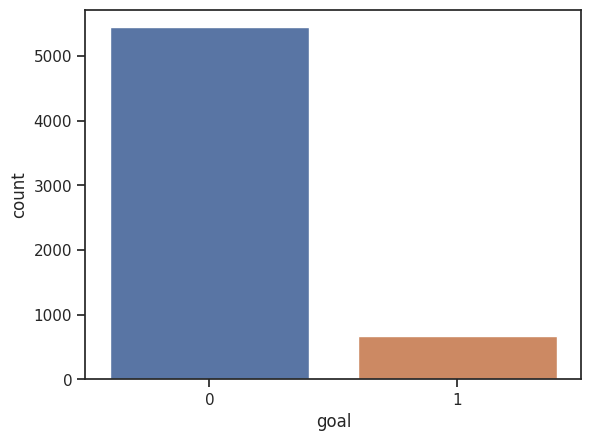

In [187]:
# Remove penalties from the data
np_shots = shots_df[shots_df['type'] != 'Penalty']

# Create a goal column, where 1 = goal and 0 = no goal
np_shots['goal'] = np.where(np_shots['outcome'] == 'Goal', 1, 0)

# Calculate average shot conversion rate
attempts = len(np_shots)
goals = sum(np_shots['goal'])
misses = attempts - goals
conversion_rate = goals / attempts
print("Average conversion rate:", "{0:.2f}%".format(conversion_rate*100))
print("")

# Plot the count of 'goal' and 'no goal' events to show imbalance
sns.set(style="ticks", color_codes=True)
sns.countplot(x="goal", data=np_shots)

In [ ]:
np_shots.head()

In [ ]:
shots_df.head()

In [188]:
# Feature engineering
# Reset index
# np_shots = np_shots.drop('level_0', axis=1)
np_shots = np_shots.reset_index()

# Create a column to show whether or not the shot was assisted
# This feature won't necessarily have much predictive power, but we may as well find out!
np_shots['assisted'] = np.where(np_shots['key_pass_id'].isna(), 0, 1)

# Create columns for distance and angle
# In this dataset, the pitch is 120 units long and 80 units wide
# We will measure distance and angle from the centre of the goal at (120, 40) to the starting point of the shot
# These features will be easier for the algorithm to interpret than start_location_x etc
np_shots['x_distance'] = 120 - np_shots['start_location_x']
np_shots['y_distance'] = abs(40 - np_shots['start_location_y'])
np_shots['distance'] = np.sqrt((np_shots['x_distance']**2 + np_shots['y_distance']**2))
np_shots['angle'] = np.degrees(np.arctan((np_shots['y_distance'] / np_shots['x_distance'])))

# We would only want to differentiate between left and right foot if we already knew the player's weak foot
# If we don't correct this, 'left foot' might be more predictive than 'right foot' due to the majority of players being right-footed
np_shots['body_part'] = np.where((np_shots['body_part'] == 'Right Foot')
                                 | (np_shots['body_part'] == 'Left Foot'), 'foot',
                                np.where(np_shots['body_part'] == 'Head', 'head', 'other'))

In [190]:
np_shots = np_shots.drop('level_0', axis=1)

In [191]:
np_shots.columns.tolist()

['id',
 'index',
 'period',
 'timestamp',
 'minute',
 'second',
 'type',
 'possession',
 'possession_team',
 'play_pattern',
 'team',
 'player',
 'position',
 'location',
 'duration',
 'related_events',
 'shot',
 'match_id',
 'possession_team_id',
 'team_id',
 'player_id',
 'under_pressure',
 'off_camera',
 'out',
 'start_location_x',
 'start_location_y',
 'shot_type',
 'outcome',
 'key_pass_id',
 'body_part',
 'technique',
 'first_time',
 'follows_dribble',
 'open_goal',
 'deflected',
 'goal',
 'assisted',
 'x_distance',
 'y_distance',
 'distance',
 'angle']

In [192]:
# Select model features and labels
feature_cols = ['play_pattern', 'under_pressure', 'body_part', 'technique', 'first_time',
                'follows_dribble', 'open_goal', 'deflected',
                'assisted', 'distance', 'angle']

features = np_shots[feature_cols]
labels = np_shots['goal']

# Fill missing values
features = features.fillna(0)
labels = labels.fillna(0)

In [196]:
features.head(1)

,play_pattern,under_pressure,body_part,technique,first_time,follows_dribble,open_goal,deflected,assisted,distance,angle
0,From Counter,0,foot,Normal,0,0,0,0,1,6.708204,63.434949


In [ ]:
labels.head(1)